In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# -*- coding:utf-8 -*-
import sys
import importlib
importlib.reload(sys)

<module 'sys' (built-in)>

In [2]:
#数据读取
data = pd.read_csv('triplet_dataset_sub_song_merged.csv')
data.head()

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


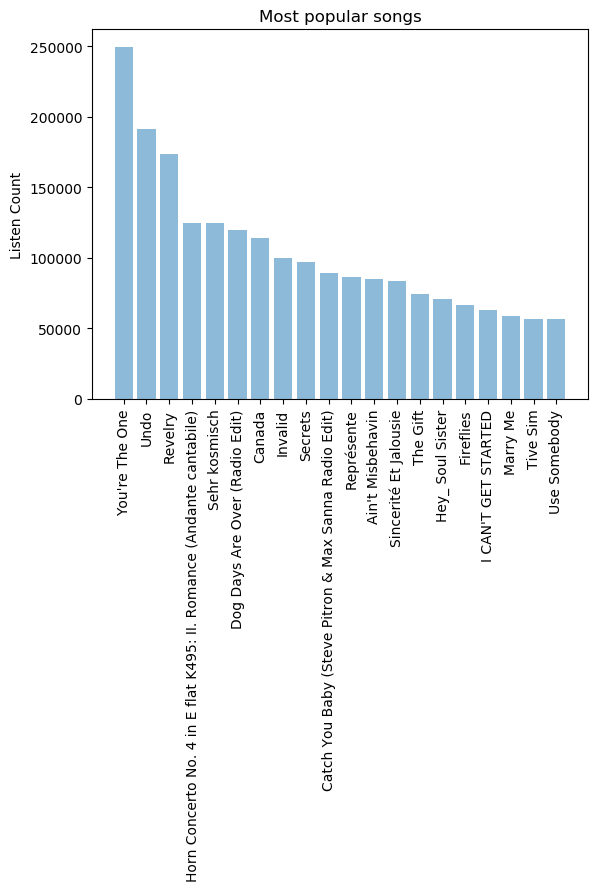

In [3]:
popular_songs = data[['title','listen_count']].groupby('title').sum().reset_index()
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_songs_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_songs_top_20['listen_count'])
 
plt.rcdefaults()    
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Listen Count')
plt.title('Most popular songs')
 
plt.show()

In [4]:
from Evaluate import popularity_recommender
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(data, test_size = 0.40, random_state=0)
train.head()

,user,song,listen_count,title,release,artist_name,year
1901799,28866ea8a809d5d46273cd0989c5515c660ef8c7,SOEYVHS12AB0181D31,1,Monster,The Fame Monster,Lady GaGa,2009
4815185,c9608a24a2a40e0ec38993a70532e7bb56eff22b,SOKIYKQ12A8AE464FC,2,Fight For Your Life,Made In NYC,The Casualties,2000
10513026,24f0b09c133a6a0fe42f097734215dceb468d449,SOETFVO12AB018DFF3,1,Free Style (feat. Kevo_ Mussilini & Lyrical 187),A Bad Azz Mix Tape,Z-RO,0
2659073,4da3c59a0af73245cea000fd5efa30384182bfcb,SOAXJOU12A6D4F6685,1,Littlest Things,Alright_ Still,Lily Allen,2006
5506263,b46c5ed385cad7ecea8af6214f440d19de6eb6c2,SOXBCAY12AB0189EE0,1,La trama y el desenlace,Amar la trama,Jorge Drexler,2010


In [ ]:
pop_recommender = popularity_recommender()
pop_recommender.fit(train, 'user','title')

#基于流行度的推荐中，推荐内容对所有的用户都一样，随便取一个用户
user = test.iat[0,0]
recommendations = pop_recommender.predict(user)

recommendations